In [139]:
import os
import numpy as np

polynomial_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'polynomial_trainable')
arr = 0
for path, directories, files in os.walk(polynomial_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        polynomial_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        polynomial_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        
linear_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'linear_trainable')
arr = 0
for path, directories, files in os.walk(linear_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        linear_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        linear_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        

found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_learning_rates.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/23_11_2020_11_35_54/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/23_11_2020_11_35_54/numpy_learning_rates.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear_trainable/23_11_2020_23_50_03/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear_trainable/23_11_2020_23_50_03/numpy_learning_rates.npy


In [137]:
#final_results/5_epochs_fashion_mnist/

import os
import numpy as np

def get_np_array(path, file):
    return np.load(os.path.join(path, file))

fashion_mnist_5_epochs_path = os.path.join(os.getcwd(),'final_results/5_epochs_fashion_mnist')

polynomial_accuracies = get_np_array(fashion_mnist_5_epochs_path, 'numpy_accuracies_polynomial_trainable.npy')
polynomial_learning_rates = get_np_array(fashion_mnist_5_epochs_path, 
                                         'numpy_learning_rates_polynomial_trainable.npy')

linear_accuracies = get_np_array(fashion_mnist_5_epochs_path, 'numpy_accuracies_linear.npy')
linear_learning_rates = get_np_array(fashion_mnist_5_epochs_path, 'numpy_learning_rates_linear.npy')

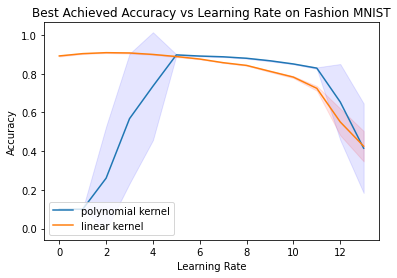

In [140]:
from matplotlib import pyplot as plt
import numpy as np
import math


def get_confidence_interval_and_mean(y):
    confidence_interval = 1.96 * np.std(y, axis=0)/math.sqrt(y.shape[0])
    mean = np.mean(y, axis=0)
    return confidence_interval, mean

polynomial_ci, polynomial_mean = get_confidence_interval_and_mean(polynomial_accuracies)

linear_ci, linear_mean = get_confidence_interval_and_mean(linear_accuracies)
x = np.array(list(range(polynomial_accuracies.shape[1])))
fig, ax = plt.subplots()
ax.plot(x,polynomial_mean)
ax.fill_between(x, (polynomial_mean-polynomial_ci), (polynomial_mean+polynomial_ci), color='b', alpha=.1)
ax.plot(x,linear_mean)
ax.fill_between(x, (linear_mean-linear_ci), (linear_mean+linear_ci), color='r', alpha=.1)

plt.title('Best Achieved Accuracy vs Learning Rate on Fashion MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend(['polynomial kernel', 'linear kernel'], loc='lower left')
plt.savefig(os.path.join(os.getcwd(), "fashion_mnist.jpg"),pil_kwargs={'quality':95}, dpi=300)
plt.show()


In [538]:
def get_columns_indices_with_no_zeros(arr):
    columns_to_include = []
    for column in range(arr.shape[1]):
        include_column = True
        for row in range(arr.shape[0]):
            if arr[row,column] == 0:
                include_column = False
        if include_column == True:
            columns_to_include.append(column)
    return columns_to_include

def get_max_upper_and_lower_bounds(ci, mean):
    upper_bounds = mean + ci
    max_upper_bound = max(upper_bounds)
    lower_bounds = mean - ci
    max_lower_bound = max(lower_bounds)
    return max_upper_bound, max_lower_bound

def get_min_upper_and_lower_bounds(ci, mean):
    upper_bounds = mean + ci
    min_upper_bound = min(upper_bounds)
    lower_bounds = mean - ci
    min_lower_bound = min(lower_bounds)
    return min_upper_bound, min_lower_bound

def get_max_mean_and_bounds(ci, mean):
    max_index = mean.argmax()
    return mean[max_index]-ci[max_index], mean[max_index], mean[max_index]+ci[max_index], ci[max_index]

def get_min_mean_and_bounds(ci, mean):
    max_index = mean.argmin()
    return mean[max_index]-ci[max_index], mean[max_index], mean[max_index]+ci[max_index], ci[max_index]

def generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, 
                    file_to_save, x_label, y_label, is_convergence=False, legend_loc='lower left',
                    single_learning_rate=False, axis_ylim=[87,100]):
    list_of_raw_data = []
    for file_name in list_of_file_names:
        list_of_raw_data.append(get_np_array(path_to_files, file_name))
        
    if single_learning_rate==False:
        learning_rates = get_np_array(path_to_files, learning_rates_file)
        learning_rates = learning_rates[0]
    
    list_of_formatted_data_to_plot = []
    for raw_data in list_of_raw_data:
        if is_convergence:
            list_of_formatted_data_to_plot.append(get_confidence_interval_and_mean(raw_data))
        else:
            list_of_formatted_data_to_plot.append(get_confidence_interval_and_mean(raw_data*100))
        
    fig, ax = plt.subplots()
    if single_learning_rate==False:
        ax.set_xscale('log',base=2)
    
    for i in range(len(list_of_formatted_data_to_plot)):
        x = []
        ci, mean = list_of_formatted_data_to_plot[i]
        if single_learning_rate==False:
            x = learning_rates
        else:
            x = list(range(len(mean)))
            x = np.array(x)
            x = (x * 100) + 100
        print("")
        print(list_of_file_names[i])
        #print(mean)
        if is_convergence:
            columns_with_no_zeros = get_columns_indices_with_no_zeros(list_of_raw_data[i])
            x = x[columns_with_no_zeros]
            ci = ci[columns_with_no_zeros]
            mean = mean[columns_with_no_zeros]
            min_upper_bound, min_lower_bound = get_min_upper_and_lower_bounds(ci, mean)
            print("min_upper_bound: " + str(min_upper_bound))
            print("min_lower_bound: " + str(min_lower_bound))
            lower, min_mean, upper, plus_minus_ci = get_min_mean_and_bounds(ci, mean)
            print("min_mean: " + str(min_mean))
            print("lower: " + str(lower))
            print("upper: " + str(upper))
            print("min_among_all_experiments: " + str(np.amin(list_of_raw_data[i])))
            fig_legend[i] = "[" + "{:.4f}".format(min_mean) + u"\u00B1" + "{:.4f}".format(plus_minus_ci) + "] " + fig_legend[i]
        else:
            max_upper_bound, max_lower_bound = get_max_upper_and_lower_bounds(ci, mean)
            print("max_upper_bound: " + str(max_upper_bound))
            print("max_lower_bound: " + str(max_lower_bound))
            lower, max_mean, upper, plus_minus_ci = get_max_mean_and_bounds(ci, mean)
            print("max_mean: " + str(max_mean))
            print("lower: " + str(lower))
            print("upper: " + str(upper))
            print("max_among_all_experiments: " + str(np.amax(list_of_raw_data[i])))
            fig_legend[i] = "[" + "{:.4f}".format(max_mean) + u"\u00B1" + "{:.4f}".format(plus_minus_ci*100) + "] " + fig_legend[i]
            #print(list_of_raw_data[i])
            #print(mean - ci)
            #print(x)
        ax.plot(x,mean)
        ax.fill_between(x, (mean+ci), (mean-ci), alpha=.1)
    axes = plt.gca()
    if not is_convergence:
        axes.set_ylim(axis_ylim)
        
    plt.title(fig_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.legend(fig_legend, loc=legend_loc)
    plt.savefig(os.path.join(os.getcwd(),'graphs', file_to_save),pil_kwargs={'quality':95}, dpi=300)
    plt.show()
    


folds_train.npy
max_upper_bound: 100.00039656512718
max_lower_bound: 99.9967447961094
max_mean: 99.99857068061829
lower: 99.9967447961094
upper: 100.00039656512718
max_among_all_experiments: 1.0

folds_validate.npy
max_upper_bound: 99.22237851781624
max_lower_bound: 99.10083420179811
max_mean: 99.15857195854187
lower: 99.09603702699206
upper: 99.22110689009168
max_among_all_experiments: 0.9924286007881165


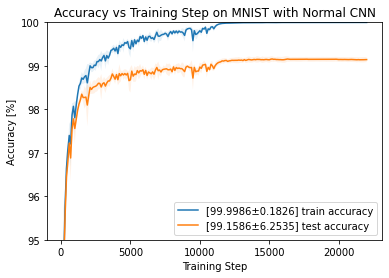

In [539]:
#overfitting example

list_of_folds_train = []
for path, directories, files in os.walk('overfitting_logs/mnist/train/linear_trainable/'):
    if 'training_accuracies_np_array.npy' in files:
        list_of_folds_train.append(np.load(os.path.join(path, 'training_accuracies_np_array.npy')))
        
list_of_folds_validate = []
for path, directories, files in os.walk('overfitting_logs/mnist/validate/linear_trainable/'):
    if 'validate_accuracies_np_array.npy' in files:
        list_of_folds_validate.append(np.load(os.path.join(path, 'validate_accuracies_np_array.npy')))
#print(list_of_folds_validate)
        
list_of_folds_train = np.array(list_of_folds_train)
np.save('overfitting_logs/folds_train', list_of_folds_train)
list_of_folds_validate = np.array(list_of_folds_validate)
np.save('overfitting_logs/folds_validate', list_of_folds_validate)

path_to_files = os.path.join(os.getcwd(),'overfitting_logs')
list_of_file_names = ['folds_train.npy', 'folds_validate.npy']
learning_rates_file = ''
fig_title = 'Accuracy vs Training Step on MNIST with Normal CNN'
fig_legend = ['train accuracy', 'test accuracy']
file_to_save = "overfitting_mnist_linear.jpg"
x_label = 'Training Step'
y_label = 'Accuracy [%]'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, legend_loc="lower right", single_learning_rate=True, axis_ylim=[95,100])


folds_train.npy
max_upper_bound: 100.00091376144462
max_lower_bound: 99.99851689132736
max_mean: 99.9992847442627
lower: 99.99851689132736
upper: 100.00005259719804
max_among_all_experiments: 1.0

folds_validate.npy
max_upper_bound: 99.07965820599284
max_lower_bound: 98.9229864225618
max_mean: 98.99142861366272
lower: 98.91783635846079
upper: 99.06502086886465
max_among_all_experiments: 0.9912142753601074


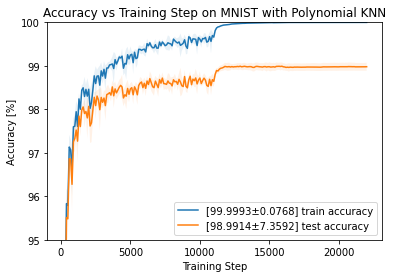

In [540]:
#overfitting example

list_of_folds_train = []
for path, directories, files in os.walk('overfitting_logs/mnist/train/polynomial_trainable/'):
    if 'training_accuracies_np_array.npy' in files:
        list_of_folds_train.append(np.load(os.path.join(path, 'training_accuracies_np_array.npy')))
        
list_of_folds_validate = []
for path, directories, files in os.walk('overfitting_logs/mnist/validate/polynomial_trainable/'):
    if 'validate_accuracies_np_array.npy' in files:
        list_of_folds_validate.append(np.load(os.path.join(path, 'validate_accuracies_np_array.npy')))
#print(list_of_folds_validate)
        
list_of_folds_train = np.array(list_of_folds_train)
np.save('overfitting_logs/folds_train', list_of_folds_train)
list_of_folds_validate = np.array(list_of_folds_validate)
np.save('overfitting_logs/folds_validate', list_of_folds_validate)

path_to_files = os.path.join(os.getcwd(),'overfitting_logs')
list_of_file_names = ['folds_train.npy', 'folds_validate.npy']
learning_rates_file = ''
fig_title = 'Accuracy vs Training Step on MNIST with Polynomial KNN'
fig_legend = ['train accuracy', 'test accuracy']
file_to_save = "overfitting_mnist_polynomial_KNN.jpg"
x_label = 'Training Step'
y_label = 'Accuracy [%]'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, legend_loc="lower right", single_learning_rate=True, axis_ylim=[95,100])

# MNIST results


polynomial_trainable/numpy_accuracies.npy
max_upper_bound: 99.05815425086013
max_lower_bound: 98.90755829644212
max_mean: 98.98285627365112
lower: 98.90755829644212
upper: 99.05815425086013
max_among_all_experiments: 0.9906428456306458

linear/numpy_accuracies.npy
max_upper_bound: 108.96004405731792
max_lower_bound: 99.1097085074901
max_mean: 99.1871428489685
lower: 99.1097085074901
upper: 99.26457719044691
max_among_all_experiments: 0.9934999942779541

mixture_of_polynomial_and_RBF/numpy_accuracies.npy
max_upper_bound: 112.23717076235388
max_lower_bound: 98.9402523593951
max_mean: 98.95857095718384
lower: 98.9402523593951
upper: 98.97688955497257
max_among_all_experiments: 0.991428554058075


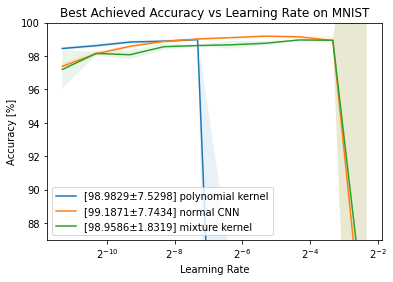

In [541]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_accuracies.npy','linear/numpy_accuracies.npy',
                     'mixture_of_polynomial_and_RBF/numpy_accuracies.npy']
learning_rates_file = 'linear/numpy_learning_rates.npy'
fig_title = 'Best Achieved Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "mnist_highest_accuracies.jpg"
x_label = 'Learning Rate'
y_label = 'Accuracy [%]'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, legend_loc="lower left")

#best lr for linear is 0.025
#best lr for polynomial is 0.00625
#best lr for RBF is 0.05




polynomial_trainable/numpy_target_convergence_97.npy
min_upper_bound: 6.086789970724379
min_lower_bound: 4.366452244056388
min_mean: 5.226621107390383
lower: 4.366452244056388
upper: 6.086789970724379
min_among_all_experiments: 0.0

linear/numpy_target_convergence_97.npy
min_upper_bound: 4.335433080016894
min_lower_bound: 1.1168512472981869
min_mean: 3.811893681023503
lower: 3.288354282030112
upper: 4.335433080016894
min_among_all_experiments: 0.0

mixture_of_polynomial_and_RBF/numpy_target_convergence_97.npy
min_upper_bound: 8.019467450525427
min_lower_bound: 6.551353200417487
min_mean: 7.2854103254714575
lower: 6.551353200417487
upper: 8.019467450525427
min_among_all_experiments: 0.0


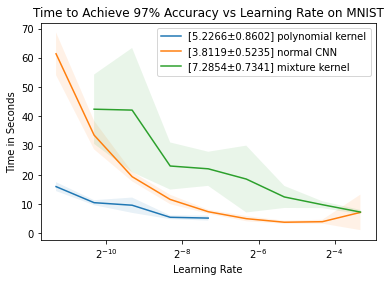

In [542]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_97.npy',
                      'linear/numpy_target_convergence_97.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_97.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 97% Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "mnist_time_to_97_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper right")


polynomial_trainable/numpy_target_convergence_98.npy
min_upper_bound: 12.580011718806869
min_lower_bound: 9.609634687880227
min_mean: 11.094823203343548
lower: 9.609634687880227
upper: 12.580011718806869
min_among_all_experiments: 0.0

linear/numpy_target_convergence_98.npy
min_upper_bound: 6.663193450216914
min_lower_bound: -1.2818203260531682
min_mean: 6.204119983817509
lower: 5.745046517418103
upper: 6.663193450216914
min_among_all_experiments: 0.0

mixture_of_polynomial_and_RBF/numpy_target_convergence_98.npy
min_upper_bound: 17.951645070135296
min_lower_bound: 13.623284762844685
min_mean: 15.78746491648999
lower: 13.623284762844685
upper: 17.951645070135296
min_among_all_experiments: 0.0


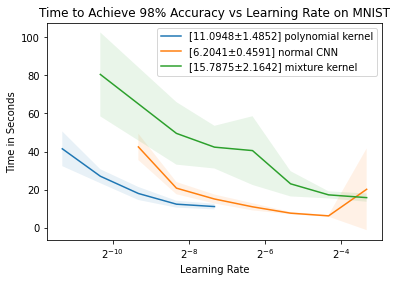

In [543]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_98.npy',
                      'linear/numpy_target_convergence_98.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_98.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 98% Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "mnist_time_to_98_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper right")

# Fashion MNIST results


polynomial_trainable/numpy_accuracies.npy
max_upper_bound: 92.88753687356281
max_lower_bound: 90.72535398412947
max_mean: 90.83000063896179
lower: 90.72535398412947
upper: 90.93464729379411
max_among_all_experiments: 0.9108571410179138

linear/numpy_accuracies.npy
max_upper_bound: 92.49070417934698
max_lower_bound: 92.09099997013027
max_mean: 92.26999878883362
lower: 92.09099997013027
upper: 92.44899760753697
max_among_all_experiments: 0.9274285435676575

mixture_of_polynomial_and_RBF/numpy_accuracies.npy
max_upper_bound: 102.95602086968627
max_lower_bound: 90.68821947950234
max_mean: 90.8642852306366
lower: 90.68821947950234
upper: 91.04035098177086
max_among_all_experiments: 0.911642849445343


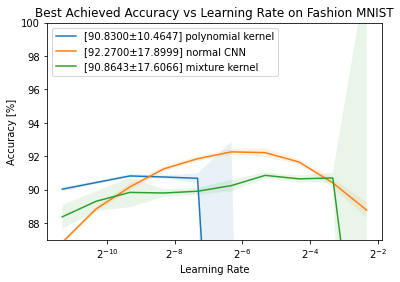

In [544]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_accuracies.npy','linear/numpy_accuracies.npy',
                     'mixture_of_polynomial_and_RBF/numpy_accuracies.npy']
learning_rates_file = 'linear/numpy_learning_rates.npy'
fig_title = 'Best Achieved Accuracy vs Learning Rate on Fashion MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "fashion_mnist_highest_accuracies.jpg"
x_label = 'Learning Rate'
y_label = 'Accuracy [%]'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, legend_loc="upper left")


polynomial_trainable/numpy_target_convergence_89.npy
min_upper_bound: 21.683723581295123
min_lower_bound: 17.28910602148586
min_mean: 19.48641480139049
lower: 17.28910602148586
upper: 21.683723581295123
min_among_all_experiments: 0.0

linear/numpy_target_convergence_89.npy
min_upper_bound: 13.841220975278073
min_lower_bound: 9.45915137467529
min_mean: 12.184516515379073
lower: 9.45915137467529
upper: 14.909881656082856
min_among_all_experiments: 0.0

mixture_of_polynomial_and_RBF/numpy_target_convergence_89.npy
min_upper_bound: 34.12722936198344
min_lower_bound: 26.272015820127024
min_mean: 30.19962259105523
lower: 26.272015820127024
upper: 34.12722936198344
min_among_all_experiments: 0.0


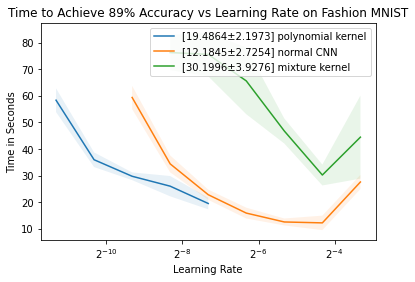

In [545]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_89.npy',
                      'linear/numpy_target_convergence_89.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_89.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 89% Accuracy vs Learning Rate on Fashion MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "fashion_mnist_time_to_89_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper right")


polynomial_trainable/numpy_target_convergence_90.npy
min_upper_bound: 49.163774628115
min_lower_bound: 34.8470042587273
min_mean: 42.00538944342115
lower: 34.8470042587273
upper: 49.163774628115
min_among_all_experiments: 0.0

linear/numpy_target_convergence_90.npy
min_upper_bound: 20.06765535720567
min_lower_bound: 15.09354161432855
min_mean: 19.57999224379164
lower: 15.09354161432855
upper: 24.06644287325473
min_among_all_experiments: 0.0

mixture_of_polynomial_and_RBF/numpy_target_convergence_90.npy
min_upper_bound: 70.65744133224455
min_lower_bound: 48.75829191860592
min_mean: 59.70786662542523
lower: 48.75829191860592
upper: 70.65744133224455
min_among_all_experiments: 0.0


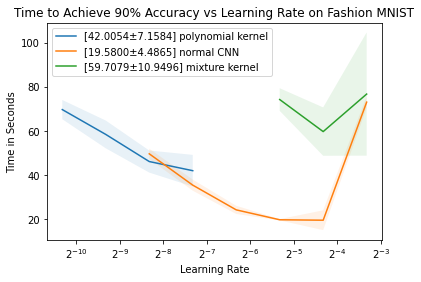

In [546]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_90.npy',
                      'linear/numpy_target_convergence_90.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_90.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 90% Accuracy vs Learning Rate on Fashion MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "fashion_mnist_time_to_90_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper left")